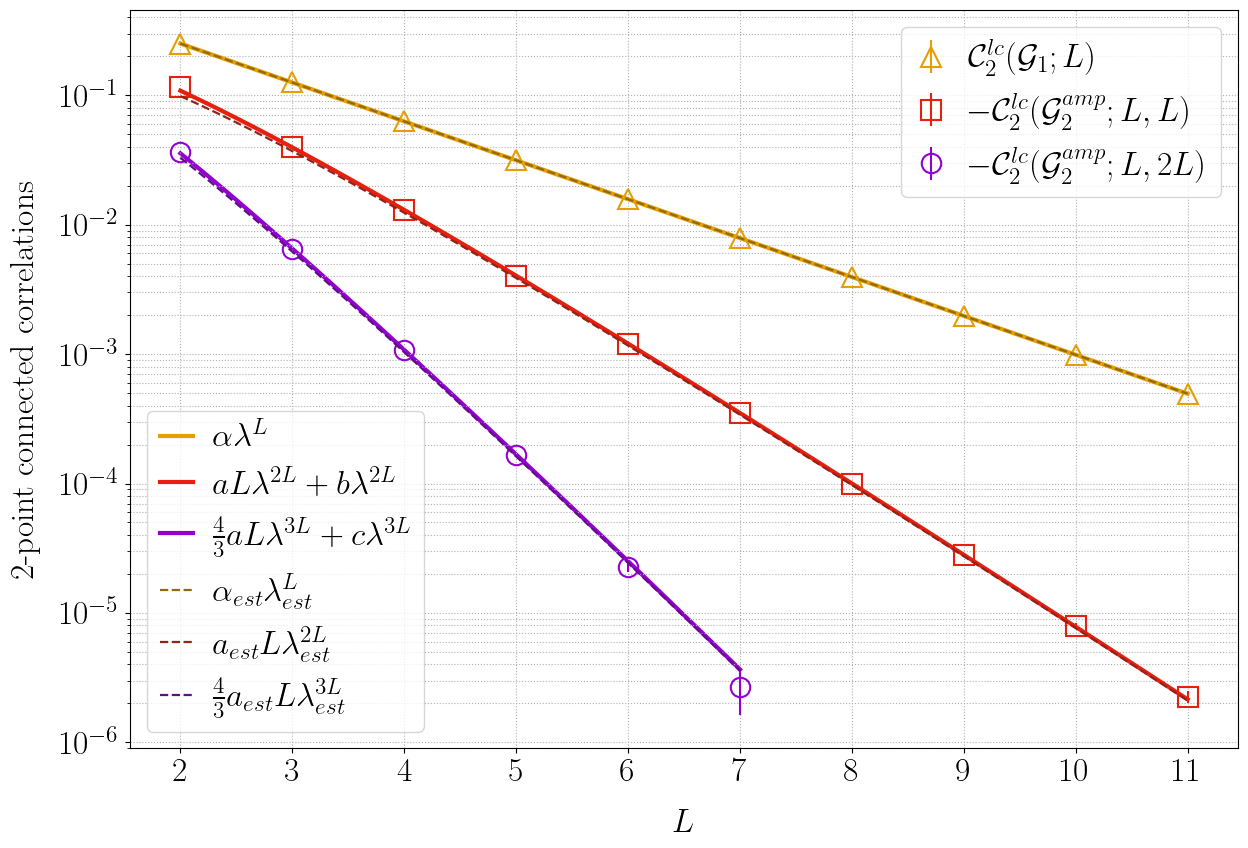

DOF: 18
α: 1.00153424 +/- 0.00003652
λ: 0.50049366 +/- 0.00000333
a: 0.78851559 +/- 0.00412745
b: 0.15134540 +/- 0.01738085
c: 0.16218969 +/- 0.01703081
Chi-squared: 18.01082819831691
Reduced chi-squared: 1.0006015665731618
P-value: 0.45493948108381577


In [1]:
import numpy as np
import scipy.optimize as optimization
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams


# Set Matplotlib fonts with LaTeX
rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 24})  # Change font size


# Function definitions
def f(x, alpha, lambda_val):
    return alpha * lambda_val**x


def g(x, a, b, lambda_val):
    return x * a * lambda_val**(2 * x) + b * lambda_val**(2 * x)


def h(x, a, c, lambda_val):
    return x * 4 / 3 * a * lambda_val**(3 * x) + c * lambda_val**(3 * x)


def m(x, alpha, lambda_val, a, b, c):
    idx_f = len(fdata)
    idx_g = idx_f + len(gdata)
    idx_h = idx_g + len(hdata)
    
    xfdata = x[:idx_f]
    xgdata = x[idx_f:idx_g]
    xhdata = x[idx_g:idx_h]


    fr = f(xfdata, alpha, lambda_val)
    gr = g(xgdata, a, b, lambda_val)
    hr = h(xhdata, a, c, lambda_val)
    
    mr = np.hstack((fr, gr, hr))
    return mr


# New curves to add
def curva1(x, a, lambda_val):
    return a * x * lambda_val**(2 * x)


def curva2(x, a, lambda_val):
    return 4 / 3 * a * x * lambda_val**(3 * x)


def curva3(x, alpha_val, lambda_val):
    return alpha_val * lambda_val**(x)

file_path_bare = f"../analisi_dati_2point/SG_media_bare1.dat"
file_path_loop_LLL = f"../analisi_dati_2point/SG_media.dat"
file_path_loop_LL2L = f"../analisi_dati_2point/SG_L2L_media.dat"

# Read .dat files using pandas
data_bare = pd.read_csv(file_path_bare, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])
data_loop_LL = pd.read_csv(file_path_loop_LLL, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])
data_loop_L2L = pd.read_csv(file_path_loop_LL2L, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])


# Filter data
frangeA, frangeB = 2, 11
f_inf, f_sup = 2, 11
data_bare_filtered = data_bare[data_bare['L'].isin(np.arange(frangeA, frangeB + 1))]
data_bare_non_filtered = data_bare[data_bare['L'].isin(np.arange(f_inf, f_sup + 1))]
xfdata = data_bare_filtered['L'].values
fdata = data_bare_filtered['corr'].values
fdata_err = data_bare_filtered['err'].values


grangeA, grangeB = 4, 11
g_inf, g_sup = 2, 11
data_loop_LL_filtered = data_loop_LL[data_loop_LL['L'].isin(np.arange(grangeA, grangeB + 1))]
data_loop_LL_non_filtered = data_loop_LL[data_loop_LL['L'].isin(np.arange(g_inf, g_sup + 1))]
xgdata = data_loop_LL_filtered['L'].values
gdata = data_loop_LL_filtered['corr'].values
gdata_err = data_loop_LL_filtered['err'].values


hrangeA, hrangeB = 3, 7
h_inf, h_sup = 2, 7
data_loop_L2L_filtered = data_loop_L2L[data_loop_L2L['L'].isin(np.arange(hrangeA, hrangeB + 1))]
data_loop_L2L_non_filtered = data_loop_L2L[data_loop_L2L['L'].isin(np.arange(h_inf, h_sup + 1))]
xhdata = data_loop_L2L_filtered['L'].values
hdata = data_loop_L2L_filtered['corr'].values
hdata_err = data_loop_L2L_filtered['err'].values


# Concatenate all data
mdata = np.hstack((fdata, gdata, hdata))
mdata_err = np.hstack((fdata_err, gdata_err, hdata_err))
xdata_new = np.hstack((xfdata, xgdata, xhdata))


# Fit the curve
popt, pcov = optimization.curve_fit(f=m, xdata=xdata_new, ydata=mdata, sigma=mdata_err, absolute_sigma=True, p0=[1, 0.5, 0.78, 0.1, 0.1])


# Calculate fitted function values
xf_fit = np.linspace(f_inf, f_sup, 100)
xg_fit = np.linspace(g_inf, g_sup, 100)
xh_fit = np.linspace(h_inf, h_sup, 100)


f_fit = f(xf_fit, popt[0], popt[1])
g_fit = g(xg_fit, popt[2], popt[3], popt[1])
h_fit = h(xh_fit, popt[2], popt[4], popt[1])


# Provided parameters for new curves
a_val = 0.78496
alpha_val = 1.001534
lambda_val = 0.5004937


# Generate data for new curves
x_curva1 = np.linspace(g_inf, g_sup, 100)
x_curva2 = np.linspace(h_inf, h_sup, 100)
x_curva3 = np.linspace(f_inf, f_sup, 100)


curva1_fit = curva1(x_curva1, a_val, lambda_val)
curva2_fit = curva2(x_curva2, a_val, lambda_val)
curva3_fit = curva3(x_curva3, alpha_val, lambda_val)


# Plot data and fitted functions
fig, ax = plt.subplots(figsize=(13, 9))


# Plot data and fitted functions
ax.errorbar(data_bare_non_filtered['L'].values, data_bare_non_filtered['corr'].values, yerr=data_bare_non_filtered['err'].values, fmt='^', markeredgewidth=1.5, markerfacecolor='none', markersize=14, label='$\\mathcal{C}_{2}^{lc}(\\mathcal{G}_1;L)$', color='#e69e00', zorder=6)
ax.plot(xf_fit, f_fit, label=r'$\alpha \lambda^{L}$', color='#e69e00', zorder=5, linewidth=3)


ax.errorbar(data_loop_LL_non_filtered['L'].values, data_loop_LL_non_filtered['corr'].values, yerr=data_loop_LL_non_filtered['err'].values, fmt='s', markeredgewidth=1.5, markerfacecolor='none', markersize=14, label='$-\\mathcal{C}_{2}^{lc}(\\mathcal{G}_2^{amp};L,L)$', color='#e61f0f', zorder=4)
ax.plot(xg_fit, g_fit, label=r'$a L \lambda^{2L} + b \lambda^{2L}$', color='#e61f0f', zorder=3, linewidth=3)


ax.errorbar(data_loop_L2L_non_filtered['L'].values, data_loop_L2L_non_filtered['corr'].values, yerr=data_loop_L2L_non_filtered['err'].values, fmt='o', markeredgewidth=1.5, markerfacecolor='none', markersize=14, label='$-\\mathcal{C}_{2}^{lc}(\\mathcal{G}_2^{amp};L,2L)$', color='#9400d4', zorder=2)
ax.plot(xh_fit, h_fit, label=r'$\frac{4}{3} a L \lambda^{3L} + c \lambda^{3L}$', color='#9400d4', zorder=1, linewidth=3)


# Plot new curves superimposed
ax.plot(x_curva3, curva3_fit, label=r'$\alpha_{est} \lambda_{est}^{L}$', color='#916910', linestyle='--', zorder=8, linewidth=1.6)
ax.plot(x_curva1, curva1_fit, label=r'$a_{est} L \lambda_{est}^{2L}$', color='#92231a', linestyle='--', zorder=7, linewidth=1.6)
ax.plot(x_curva2, curva2_fit, label=r'$\frac{4}{3} a_{est} L \lambda_{est}^{3L}$', color='#620f86', linestyle='--', zorder=8, linewidth=1.6)


# Set scales and labels
ax.set_yscale('log')
ax.set_xlabel('$L$', labelpad=15)
plt.rcParams['font.family'] = 'CMU Serif'
ax.set_ylabel('2-point connected correlations', labelpad=15)


# Add ticks for each integer value of L
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))


# Add legends with the new curves
handles, labels = ax.get_legend_handles_labels()
legend1 = ax.legend(handles[:6], labels[:6], loc='lower left', fontsize=24, handletextpad=0.6, handlelength=1)
legend2 = ax.legend(handles[6:], labels[6:], loc='upper right', fontsize=24, handletextpad=0.6, handlelength=1)


# Add the first legend to the axes to make it visible with the second
ax.add_artist(legend1)


# Set grid with lower zorder than markers
ax.grid(True, zorder=0)
plt.grid(True, which="both", ls="dotted", linewidth=0.8)



# Show the plot
plt.tight_layout()
plt.savefig('joint_fit_2point.pdf', format='pdf', dpi=300)
plt.show()


# Calculate residuals
residuals = mdata - m(xdata_new, *popt)


# Calculate the reduced chi-square
chi_squared = np.sum((residuals / mdata_err)**2)
dof = len(mdata) - len(popt)  # degrees of freedom
print(f"DOF: {dof}")
reduced_chi_squared = chi_squared / dof


# Calculate the p-value
p_value = 1 - stats.chi2.cdf(chi_squared, dof)


# unpack the results
fit_α, fit_λ, fit_a, fit_b, fit_c = popt
fit_sα, fit_sλ, fit_sa, fit_sb, fit_sc = np.sqrt(np.diag(pcov))


# print the fit results:
print("α: %.8f +/- %.8f" % (fit_α, fit_sα))
print("λ: %.8f +/- %.8f" % (fit_λ, fit_sλ))
print("a: %.8f +/- %.8f" % (fit_a, fit_sa))
print("b: %.8f +/- %.8f" % (fit_b, fit_sb))
print("c: %.8f +/- %.8f" % (fit_c, fit_sc))


print(f"Chi-squared: {chi_squared}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
print(f"P-value: {p_value}")
